 # Proyek Analisis Data: Bike-sharing-dataset,
- **Nama        :** Ansharulhaq Aminsyah
- **Email       :** ansharulhaqaminsyah08@gmail.com
- **ID Dicoding :** scottch

## Pertanyaan Bisnis yang ditentukan
1. Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?
2. Apakah penggunaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur?

## Import Library/Package yang diperlukan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [6]:
# Load the datasets
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

In [7]:
day_df.head() # Melihat beberapa baris pertama dari dataset day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
hour_df.head() # Melihat beberapa baris pertama dari dataset hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset yang digunakan adalah Bike Sharing Dataset, berisi data harian terkait penggunaan sepeda.
- Data ini memuat informasi mengenai suhu, kelembaban, kecepatan angin, serta jumlah total pengguna sepeda (baik yang casual maupun terdaftar) untuk setiap hari dalam dua tahun (2011-2012).

### Assessing Data

In [9]:
# Memeriksa tipe data dan missing values
day_df.info()
day_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# Memeriksa tipe data dan missing values
hour_df.info()
hour_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ada nilai yang hilang di dataset. Setiap kolom memiliki jumlah data yang lengkap.
- Tipe data sudah sesuai untuk setiap kolom, misalnya kolom tanggal sebagai object (akan diubah menjadi datetime), sedangkan variabel lainnya (seperti suhu, kelembaban, kecepatan angin) sudah dalam bentuk numerik yang siap dianalisis.

In [11]:
# Convert 'dteday' to datetime format in both datasets
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

### Cleaning Data

**Insight:**
- Data sudah bersih dan tidak memerlukan pembersihan tambahan karena tidak ada missing values atau anomali lainnya.

## Exploratory Data Analysis (EDA)

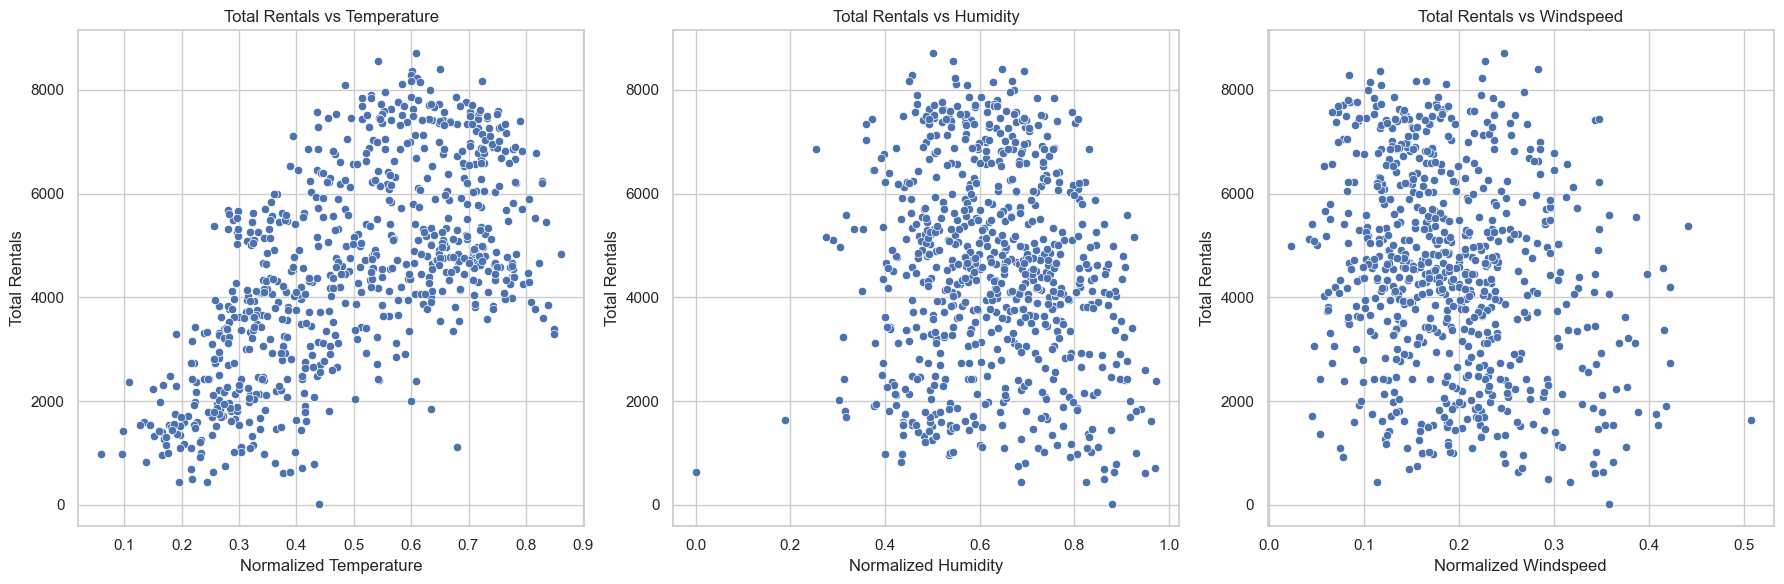

In [12]:
# Plotting hubungan antara total bike rentals dan weather conditions (temp, hum, windspeed)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Temperature vs total rentals
sns.scatterplot(ax=axes[0], x=day_df['temp'], y=day_df['cnt'])
axes[0].set_title('Total Rentals vs Temperature')
axes[0].set_xlabel('Normalized Temperature')
axes[0].set_ylabel('Total Rentals')

# Humidity vs total rentals
sns.scatterplot(ax=axes[1], x=day_df['hum'], y=day_df['cnt'])
axes[1].set_title('Total Rentals vs Humidity')
axes[1].set_xlabel('Normalized Humidity')
axes[1].set_ylabel('Total Rentals')

# Windspeed vs total rentals
sns.scatterplot(ax=axes[2], x=day_df['windspeed'], y=day_df['cnt'])
axes[2].set_title('Total Rentals vs Windspeed')
axes[2].set_xlabel('Normalized Windspeed')
axes[2].set_ylabel('Total Rentals')

plt.tight_layout()
plt.show()

**Insight:**
- Suhu (Temperature): Ada hubungan positif antara suhu dan penggunaan sepeda. Semakin tinggi suhu (hingga kisaran suhu yang nyaman), semakin banyak sepeda yang disewa. Puncak penggunaan terlihat pada suhu normalisasi sekitar 0.5-0.7.
- Kelembaban (Humidity): Tidak ada hubungan yang jelas antara kelembaban dan penggunaan sepeda, tetapi ada kecenderungan penurunan jumlah pengguna saat kelembaban sangat tinggi.
- Kecepatan Angin (Windspeed): Tidak terlihat adanya hubungan kuat antara kecepatan angin dan jumlah penggunaan sepeda. Penggunaan tetap stabil di berbagai level kecepatan angin.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?

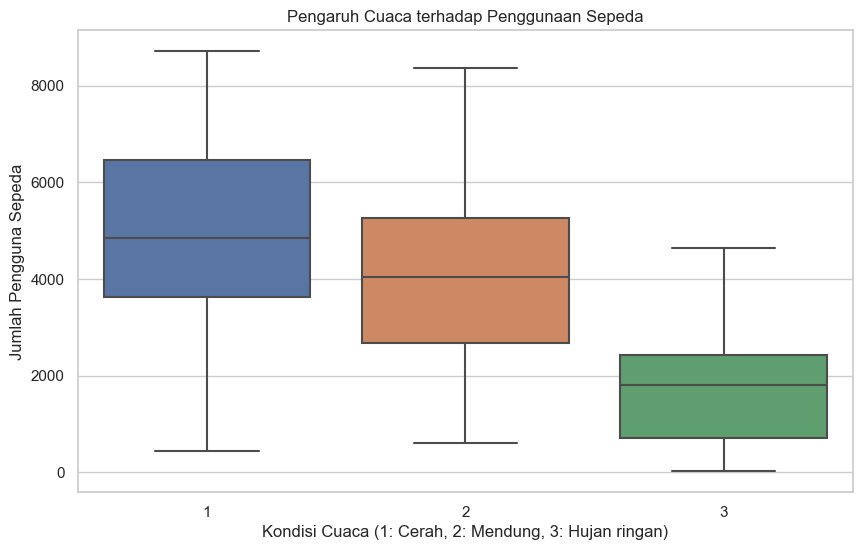

In [14]:
# Visualisasi pengaruh kondisi cuaca terhadap penggunaan sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Pengaruh Cuaca terhadap Penggunaan Sepeda')
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Mendung, 3: Hujan ringan)')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

**Insight:**
- Visualisasi menunjukkan bahwa jumlah pengguna sepeda lebih tinggi saat cuaca cerah, dan menurun ketika cuaca mendung atau hujan ringan.

### Pertanyaan 2: Apakah penggunaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur?

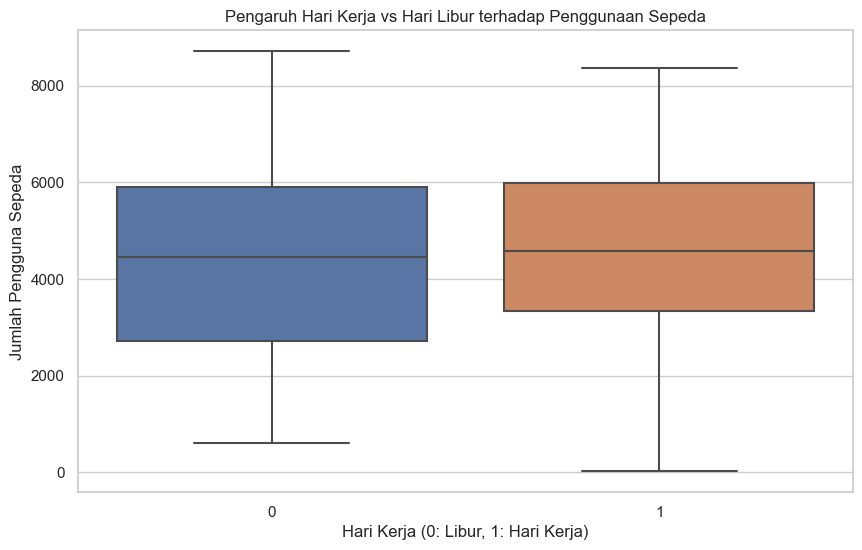

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.title('Pengaruh Hari Kerja vs Hari Libur terhadap Penggunaan Sepeda')
plt.xlabel('Hari Kerja (0: Libur, 1: Hari Kerja)')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

**Insight:**
- Visualisasi ini menunjukkan bahwa penggunaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur.

## Analisis Lanjutan (Opsional)

# Conclusion
- Pengaruh Cuaca: Pengguna sepeda lebih banyak saat cuaca cerah. Kondisi cuaca yang buruk seperti mendung atau hujan ringan menyebabkan penurunan jumlah pengguna.
- Hari Kerja vs Hari Libur: Penggunaan sepeda lebih tinggi pada hari kerja, menunjukkan bahwa sepeda lebih sering digunakan sebagai alat transportasi harian daripada untuk rekreasi.